In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('coaster_db.csv')

### DataFrame preparation

In [3]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

- let's select only the relevant columns 

In [4]:
df = df[['coaster_name', 
     #   'Length', 'Speed', 
    'Location', 
    'Status', 
        #'Opening date',
 #      'Type', 
    'Manufacturer', 
 #       'Height restriction', 'Model', 'Height',
 #      'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
 #      'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
 #      'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
 #      'Track layout', 'Fastrack available', 'Soft opening date.1',
  #     'Closing date', 'Opened', 'Replaced by', 'Website',
  #     'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
  #     'Single rider line available', 'Restraint Style',
  #     'Flash Pass available', 'Acceleration', 'Restraints', 'Name',     
    'year_introduced', 
    'latitude', 'longitude', 'Type_Main',
    'opening_date_clean', 
        #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
  #      'height_value', 'height_unit', 
    'height_ft',
    'Inversions_clean', 'Gforce_clean']].copy()

In [5]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

- rename the columns

In [6]:
df = df.rename( columns = {
    'coaster_name':'Coaster_name',
    'year_introduced' : 'Year_Introduced',
     'latitude' : 'Latitude', 
    'longitude' : 'Longitude',
    'opening_date_clean' : 'Opening_date',
    'speed_mph' : 'Speed_mph',
    'height_ft' : 'Height_ft',
    'Inversions_clean' : 'Inversions',
    'Gforce_clean' :  'Gforce' } )


In [7]:
df.shape

(1087, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Coaster_name     1087 non-null   object 
 1   Location         1087 non-null   object 
 2   Status           874 non-null    object 
 3   Manufacturer     1028 non-null   object 
 4   Year_Introduced  1087 non-null   int64  
 5   Latitude         812 non-null    float64
 6   Longitude        812 non-null    float64
 7   Type_Main        1087 non-null   object 
 8   Opening_date     837 non-null    object 
 9   Speed_mph        937 non-null    float64
 10  Height_ft        171 non-null    float64
 11  Inversions       1087 non-null   int64  
 12  Gforce           362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


In [9]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


- let's create a table to calculate the number of missing values and its percentage

In [10]:
print(len(df))

1087


In [11]:
def missing_value_table(df):
    missing_value = df.isnull().sum()
    missing_val_per = (df.isnull().sum() / len(df)) * 100
    table = pd.concat( [missing_value , missing_val_per], axis = 1 )
    mis_table_renamed = table.rename( columns = {0 : 'Missing_value_counts', 1: "% of Total Values" } )
    return mis_table_renamed
    

In [12]:
missing_value_table(df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,213,19.595216
Manufacturer,59,5.427783
Year_Introduced,0,0.000000
Latitude,275,25.298988
Longitude,275,25.298988
Type_Main,0,0.000000
Opening_date,250,22.999080
Speed_mph,150,13.799448


#### Dealing with duplicates

- a roller coaster cannot have the same name, same location, same opening date

In [13]:
df.loc[df.duplicated(subset = ['Coaster_name', 'Location', 'Opening_date'])]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaN,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaN,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaN,53.0,NaN,3,4.7


In [14]:
df.query('Coaster_name == "Crystal Beach Cyclone"')

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [15]:
df.shape

(1087, 13)

In [16]:
df = df.drop_duplicates(subset = ['Coaster_name', 'Location', 'Opening_date'] )

In [17]:
df.shape

(990, 13)

In [18]:
df.query('Coaster_name == "Crystal Beach Cyclone"')

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


- check the last record index, it should be 989

In [19]:
df.tail(1)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
1086,Wonder Woman Flight of Courage,Six Flags Magic Mountain,Under construction,Rocky Mountain Construction,2022,NaN,NaN,Steel,2022-01-01,58.0,NaN,3,NaN


- let's reset the index

In [20]:
df = df.reset_index(drop=True)
df.tail(1)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
989,Wonder Woman Flight of Courage,Six Flags Magic Mountain,Under construction,Rocky Mountain Construction,2022,NaN,NaN,Steel,2022-01-01,58.0,NaN,3,NaN


### Dealing with null values
- the final part

- let's use missingno to identify the missing value pattern
- MCAR ? MNAR ? MAR?

<Axes: >

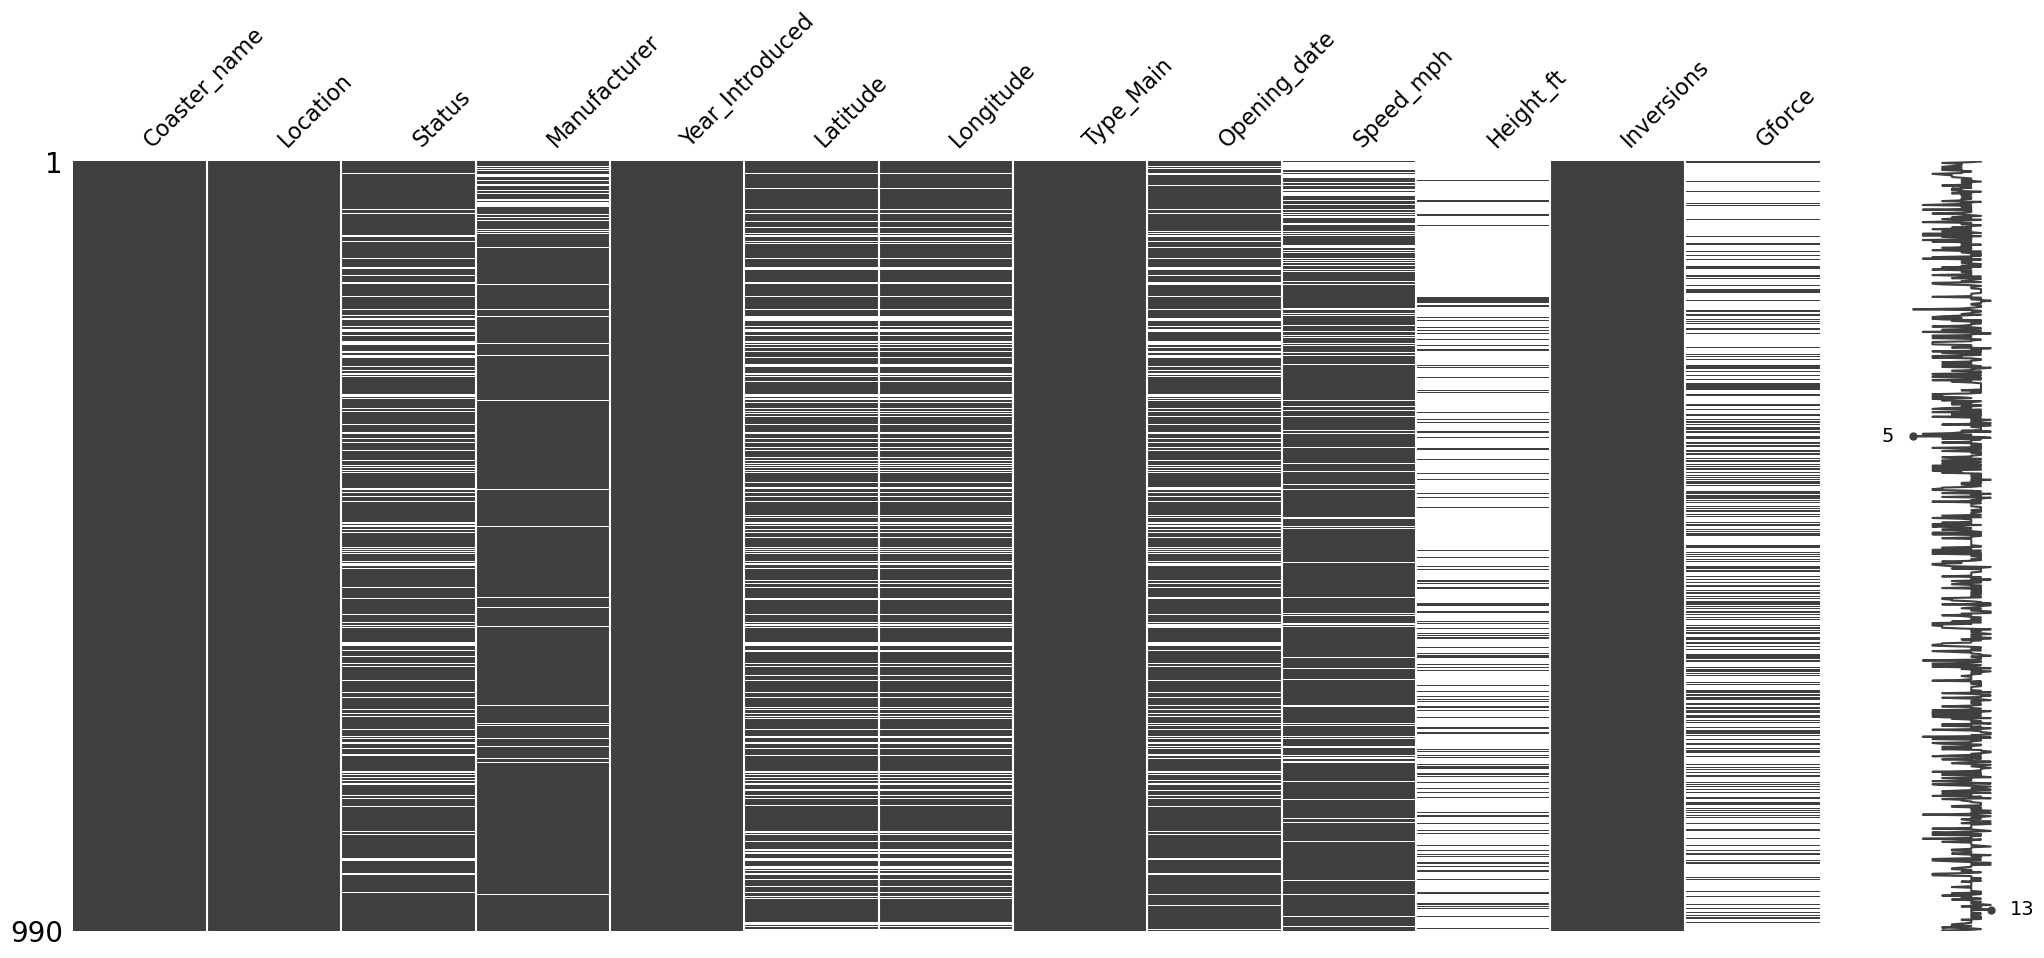

In [21]:
msno.matrix(df)

<Axes: >

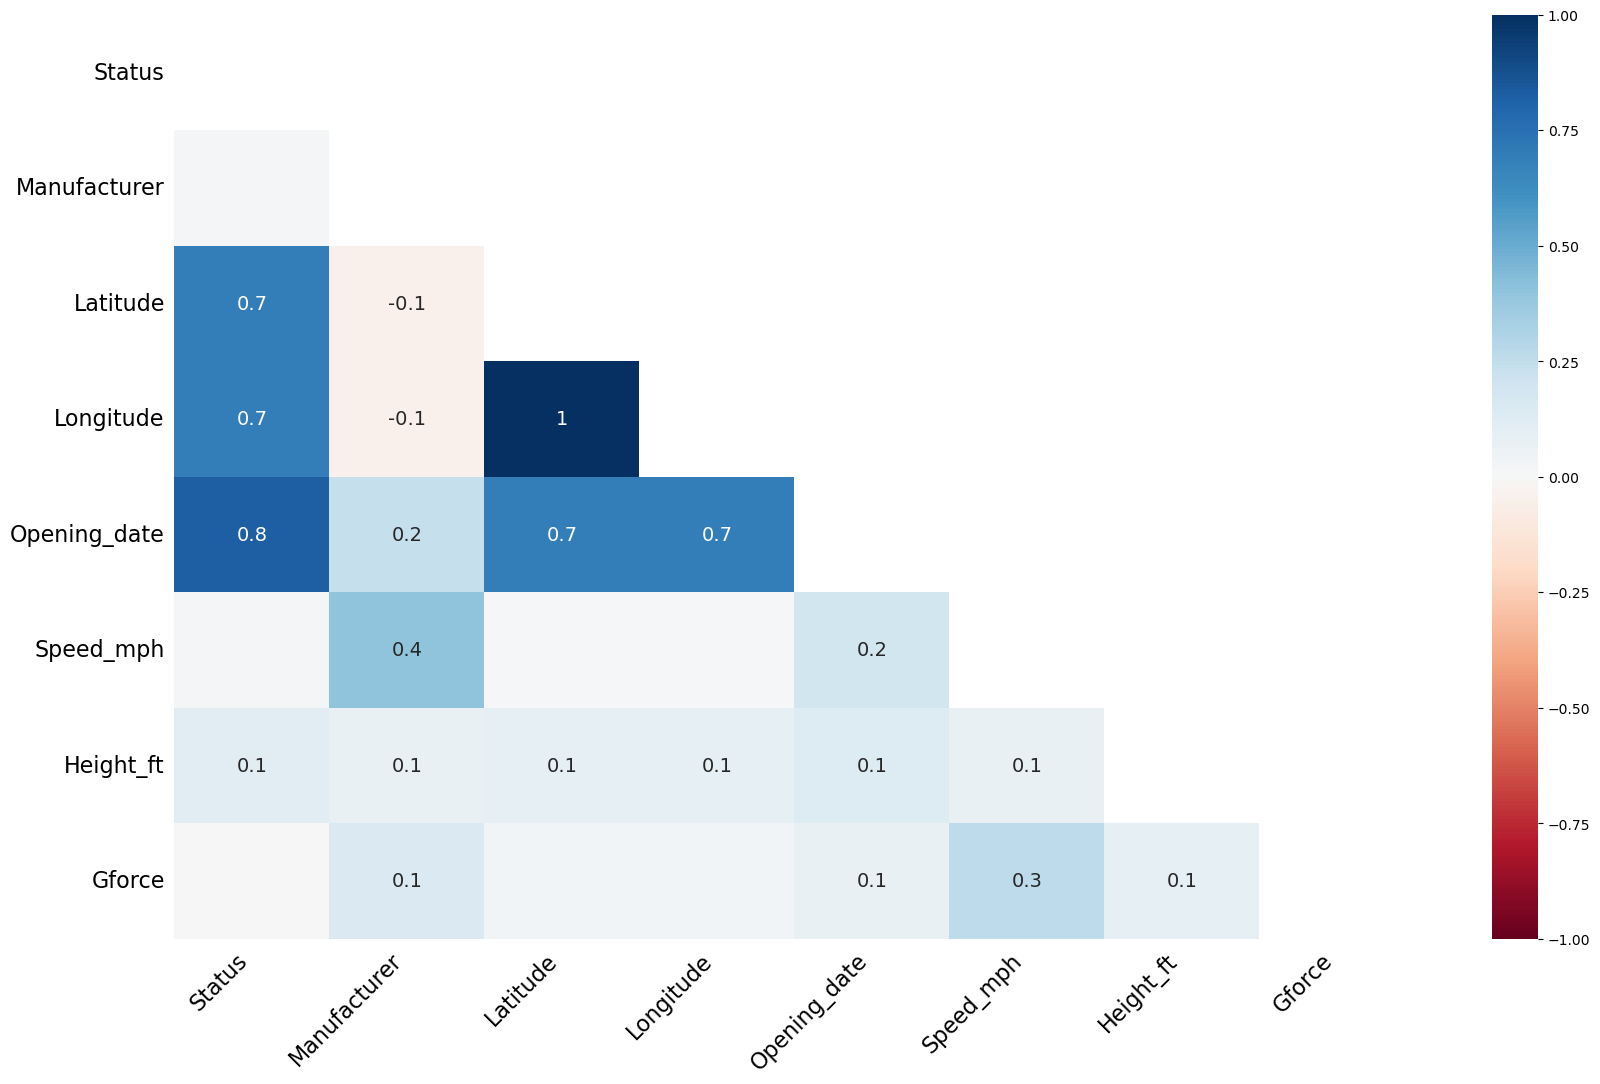

In [22]:
msno.heatmap(df)

- if the value is close to -1, then the present of null value in one column is anti-correlated to the other column
- if the value is close to 0, then there is no relationship between the null value in one column to the other

#### Data type checking

In [23]:
df.dtypes

Coaster_name        object
Location            object
Status              object
Manufacturer        object
Year_Introduced      int64
Latitude           float64
Longitude          float64
Type_Main           object
Opening_date        object
Speed_mph          float64
Height_ft          float64
Inversions           int64
Gforce             float64
dtype: object

- change the opening date to date format

In [24]:
df['Opening_date'] = pd.to_datetime(df['Opening_date'].astype(str), format='%Y-%m-%d')

In [25]:
df.head(1)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9


In [26]:
df.dtypes

Coaster_name               object
Location                   object
Status                     object
Manufacturer               object
Year_Introduced             int64
Latitude                  float64
Longitude                 float64
Type_Main                  object
Opening_date       datetime64[ns]
Speed_mph                 float64
Height_ft                 float64
Inversions                  int64
Gforce                    float64
dtype: object

#### Let's deal with the columns with empty value

- list out all the column with null values

In [27]:
df.columns[df.isnull().any()].tolist()

['Status',
 'Manufacturer',
 'Latitude',
 'Longitude',
 'Opening_date',
 'Speed_mph',
 'Height_ft',
 'Gforce']

#### Status column

In [28]:
df['Status'].unique()

array(['Removed', 'Closed', 'Operating', nan, 'Not Currently Operating',
       'In Production', 'Discontinued',
       'closed for maintenance as of july 30 no reopening date known',
       'Closed in 2021', 'SBNO December 2019', 'Under construction',
       'Temporarily Closed', 'SBNO (Standing But Not Operating)',
       'Temporarily closed',
       'Chapter 7 bankruptcy; rides dismantled and sold; property sold',
       'Under Maintenance'], dtype=object)

In [29]:
df['Status'].value_counts()

Operating                                                         646
Removed                                                           133
Closed                                                             23
Under construction                                                 14
In Production                                                      11
Discontinued                                                        7
Chapter 7 bankruptcy; rides dismantled and sold; property sold      2
Not Currently Operating                                             1
closed for maintenance as of july 30 no reopening date known        1
Closed in 2021                                                      1
SBNO December 2019                                                  1
Temporarily Closed                                                  1
SBNO (Standing But Not Operating)                                   1
Temporarily closed                                                  1
Under Maintenance   

- let's remap the data with a dictionary: 
- group these under {'Operating', 'SBNO (Standing But Not Operating)  ', and  the rest as 'Discontinued' } 

In [30]:
status_categories = {
    'Operating': ['Operating', 'In Production', 'Under construction'],
    'SBNO (Standing But Not Operating)': ['SBNO (Standing But Not Operating)'],
    'Discontinued': ['Removed', 'Closed', 'Discontinued', 
                     'Chapter 7 bankruptcy; rides dismantled and sold; property sold',
                     'Closed in 2021', 'SBNO December 2019', 'Temporarily Closed', 
                     'closed for maintenance as of july 30 no reopening date known', 
                     'Not Currently Operating', 'Under Maintenance', 'Temporarily closed']
}

for category, status in status_categories.items():
    df['Status'] = df['Status'].replace(status, category)


In [31]:
df['Status'].value_counts()

Operating                            671
Discontinued                         172
SBNO (Standing But Not Operating)      1
Name: Status, dtype: int64

In [32]:
df['Status'].isnull().value_counts()

False    844
True     146
Name: Status, dtype: int64

- let's test something here
- let's create a new dataframe where we drop the records if the status is unknown
- check on its impact on other columns null value percentage

In [33]:
testing_df = df[~df['Status'].isnull()]

In [34]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 989
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_name     844 non-null    object        
 1   Location         844 non-null    object        
 2   Status           844 non-null    object        
 3   Manufacturer     796 non-null    object        
 4   Year_Introduced  844 non-null    int64         
 5   Latitude         766 non-null    float64       
 6   Longitude        766 non-null    float64       
 7   Type_Main        844 non-null    object        
 8   Opening_date     800 non-null    datetime64[ns]
 9   Speed_mph        727 non-null    float64       
 10  Height_ft        150 non-null    float64       
 11  Inversions       844 non-null    int64         
 12  Gforce           275 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 92.3+ KB


In [35]:
missing_value_table(df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,146,14.747475
Manufacturer,58,5.858586
Year_Introduced,0,0.000000
Latitude,207,20.909091
Longitude,207,20.909091
Type_Main,0,0.000000
Opening_date,183,18.484848
Speed_mph,140,14.141414


In [36]:
missing_value_table(testing_df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,0,0.000000
Manufacturer,48,5.687204
Year_Introduced,0,0.000000
Latitude,78,9.241706
Longitude,78,9.241706
Type_Main,0,0.000000
Opening_date,44,5.213270
Speed_mph,117,13.862559


- looking at the null percentage of the columns
- dropping the roller coaster with unknown status has reduced the number of unk value on other columns such as
    - Latitude, Longitude, Opening_date
- so, we use the new dataframe

In [37]:
df = testing_df

In [38]:
df.shape

(844, 13)

#### Manufacturer column

In [39]:
df['Manufacturer'].value_counts()

Bolliger & Mabillard                94
Vekoma                              92
Intamin                             71
Arrow Dynamics                      47
Mack Rides                          45
                                    ..
BHS                                  1
British Rail Engineering Limited     1
Bailey Rides, Inc.                   1
Preston & Barbieri                   1
Gravitykraft Corporation             1
Name: Manufacturer, Length: 98, dtype: int64

- let's fill the na with unknown

In [40]:
df["Manufacturer"].fillna("Unknown", inplace = True) 


In [41]:
df['Manufacturer'].value_counts()

Bolliger & Mabillard                94
Vekoma                              92
Intamin                             71
Unknown                             48
Arrow Dynamics                      47
                                    ..
BHS                                  1
British Rail Engineering Limited     1
Bailey Rides, Inc.                   1
Preston & Barbieri                   1
Gravitykraft Corporation             1
Name: Manufacturer, Length: 99, dtype: int64

In [42]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [43]:
missing_value_table(df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,0,0.000000
Manufacturer,0,0.000000
Year_Introduced,0,0.000000
Latitude,78,9.241706
Longitude,78,9.241706
Type_Main,0,0.000000
Opening_date,44,5.213270
Speed_mph,117,13.862559


### Latitute and Longtitude

In [44]:
df.loc[df['Latitude'].isnull() & df['Longitude'].isnull()].head()


,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
15,The Great Scenic Railway,Luna Park Melbourne,Operating,LaMarcus Thompson,1912,NaN,NaN,Wood,1912-12-01,37.3,52.5,0,NaN
35,Giant Dipper (Belmont Park),Other,Operating,"Frank Prior, Fredrick Church",1925,NaN,NaN,Wood,1925-07-04,48.0,NaN,0,NaN
74,Big Dipper (Camden Park),Camden Park,Operating,National Amusement Devices,1958,NaN,NaN,Other,1958-01-01,NaN,NaN,0,NaN
77,Matterhorn Bobsleds,Other,Operating,Arrow Development,1959,NaN,NaN,Steel,1959-06-14,27.0,NaN,0,NaN


In [45]:
df.loc[df['Latitude'].isnull() & df['Longitude'].isnull()].head()


,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
15,The Great Scenic Railway,Luna Park Melbourne,Operating,LaMarcus Thompson,1912,NaN,NaN,Wood,1912-12-01,37.3,52.5,0,NaN
35,Giant Dipper (Belmont Park),Other,Operating,"Frank Prior, Fredrick Church",1925,NaN,NaN,Wood,1925-07-04,48.0,NaN,0,NaN
74,Big Dipper (Camden Park),Camden Park,Operating,National Amusement Devices,1958,NaN,NaN,Other,1958-01-01,NaN,NaN,0,NaN
77,Matterhorn Bobsleds,Other,Operating,Arrow Development,1959,NaN,NaN,Steel,1959-06-14,27.0,NaN,0,NaN


- let's do a small test, how does deleting the records with longtitude and latitude that is null

In [46]:
missing_value_table(df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,0,0.000000
Manufacturer,0,0.000000
Year_Introduced,0,0.000000
Latitude,78,9.241706
Longitude,78,9.241706
Type_Main,0,0.000000
Opening_date,44,5.213270
Speed_mph,117,13.862559


In [47]:
testing_df = df.copy()

In [48]:
testing_df.dropna(subset = ['Latitude','Longitude'] , inplace=True)

In [49]:
missing_value_table(testing_df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,0,0.000000
Manufacturer,0,0.000000
Year_Introduced,0,0.000000
Latitude,0,0.000000
Longitude,0,0.000000
Type_Main,0,0.000000
Opening_date,22,2.872063
Speed_mph,100,13.054830


In [50]:
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 987
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_name     766 non-null    object        
 1   Location         766 non-null    object        
 2   Status           766 non-null    object        
 3   Manufacturer     766 non-null    object        
 4   Year_Introduced  766 non-null    int64         
 5   Latitude         766 non-null    float64       
 6   Longitude        766 non-null    float64       
 7   Type_Main        766 non-null    object        
 8   Opening_date     744 non-null    datetime64[ns]
 9   Speed_mph        666 non-null    float64       
 10  Height_ft        138 non-null    float64       
 11  Inversions       766 non-null    int64         
 12  Gforce           259 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 83.8+ KB


- from the results above, we will include longtitude and latitude that are null, since deletion of it won't change te result much
- too many deletion can leads to information lost
- it's better to leave it as null, rather than giving fake longtitude and latitude that hinders the real location

#### Opening Date

In [51]:
df.head(5)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [52]:
index_to_retrieve = 773

indices_to_retrieve = [index_to_retrieve - 1, index_to_retrieve, index_to_retrieve + 1]

selected_rows = df.loc[indices_to_retrieve]

selected_rows

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
772,Black Diamond (roller coaster),Knoebels Amusement Resort,Operating,Philadelphia Toboggan Coasters,2011,40.8797,-76.5068,Steel,2011-10-08,NaN,NaN,0,NaN
773,Blue Flyer,Blackpool Pleasure Beach,Operating,Unknown,2011,53.7902,-3.0539,Other,1934-01-01,NaN,NaN,0,NaN
774,BomBora (Lagoon),Lagoon,Operating,Lagoon,2011,40.9855,-111.8923,Steel,2011-04-02,31.0,NaN,0,NaN


### Year_Introduced
#### Before filling up the null, let's check any discrepancy between the year of opening_date and year_introduced

- in most cases, the year of opening date is always after or on the same year as the introduced year

- Initial thoughts
- with this dataset, let's check out any records where the year introduced is later than the opening date

In [53]:
df['Opening_date'].isnull().value_counts()

False    800
True      44
Name: Opening_date, dtype: int64

In [54]:
df.head(15)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
5,Cannon Coaster,Coney Island,Discontinued,George Francis Meyer,1902,40.5750,-73.9800,Wood,1902-01-01,NaN,NaN,0,NaN
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1904,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
8,Drop the Dip,Coney Island,Discontinued,Arthur Jarvis,1907,40.5744,-73.9786,Other,1907-06-06,NaN,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1907,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN


In [55]:
def check_discrepancy(df):
    results = (df['Year_Introduced'] - df['Opening_date'].dt.year > 1) & (df['Year_Introduced'] >= df['Opening_date'].dt.year)
    return results.value_counts()

In [56]:
check_discrepancy(df)

False    830
True      14
dtype: int64

- there are 14 roller coasters whose year_introduced is greater than the opening_date

In [57]:
df.loc[(df['Year_Introduced'] - df['Opening_date'].dt.year > 1) & (df['Year_Introduced'] >= df['Opening_date'].dt.year)]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
171,The Beastie (Kings Island),Kings Island,Operating,Philadelphia Toboggan Coasters,1980,39.3432,-84.2693,Wood,1972-01-01,35.0,NaN,0,NaN
236,Canobie Corkscrew,Canobie Lake Park,Discontinued,Arrow Development,1987,42.7935,-71.2499,Steel,1975-01-01,45.0,NaN,2,NaN
331,The Comet (Great Escape),Great Escape,Operating,Philadelphia Toboggan Coasters,1994,43.3514,-73.6851,Wood,1948-01-01,55.0,NaN,0,NaN
552,Phantom's Revenge,Kennywood,Operating,D. H. Morgan Manufacturing,2001,40.3890,-79.8660,Steel,1991-05-10,85.0,NaN,0,3.5
640,Fairly Odd Coaster (Carowinds),Carowinds,Operating,Philadelphia Toboggan Coasters,2005,35.1010,-80.9394,Wood,1975-01-01,36.0,NaN,0,NaN
662,Fairly Odd Coaster (Kings Island),Kings Island,Operating,Philadelphia Toboggan Coasters,2006,39.3432,-84.2693,Wood,1972-01-01,35.0,NaN,0,NaN
712,Flight Deck (Kings Island),Kings Island,Operating,Arrow Dynamics,2008,39.3476,-84.2652,Steel,1993-04-09,51.0,NaN,0,2.9
769,Woodstock Express (Carowinds),Carowinds,Operating,Philadelphia Toboggan Coasters,2010,35.1010,-80.9394,Wood,1975-01-01,36.0,NaN,0,NaN
770,Woodstock Express (Kings Island),Kings Island,Operating,Philadelphia Toboggan Coasters,2010,39.3432,-84.2693,Wood,1972-01-01,35.0,NaN,0,NaN
773,Blue Flyer,Blackpool Pleasure Beach,Operating,Unknown,2011,53.7902,-3.0539,Other,1934-01-01,NaN,NaN,0,NaN


- let's research on any 3 random coaster name from the df on wikipedia
- 171, The Beastie, Previously known as Scooby Doo (1972–1979), Beastie (1980–2005)
- 236, Canobie Corkscrew, Opening date	1975 (Chicago Loop), 1982 (Corkscrew), 1987 (Canobie Lake Corkscrew)
- 910, Patriot (California's Great America), Previously known as Vortex (1991–2016), it reopened as Patriot on 2017

- the name of the coasters are rebranded
- all the coasters above used the first introduced opening date, not the opening date after rebranding

In [58]:
index  = 236
df.loc[index]

Coaster_name         Canobie Corkscrew
Location             Canobie Lake Park
Status                    Discontinued
Manufacturer         Arrow Development
Year_Introduced                   1987
Latitude                       42.7935
Longitude                     -71.2499
Type_Main                        Steel
Opening_date       1975-01-01 00:00:00
Speed_mph                         45.0
Height_ft                          NaN
Inversions                           2
Gforce                             NaN
Name: 236, dtype: object

In [59]:
# df.loc[~((df['Year_Introduced'] - df['Opening_date'].dt.year > 1) & (df['Year_Introduced'] >= df['Opening_date'].dt.year))].head()

In [60]:
# df.loc[(df['Year_Introduced'] - df['Opening_date'].dt.year > 1) & (df['Year_Introduced'] >= df['Opening_date'].dt.year)].head()

In [61]:
conditions = (df['Year_Introduced'] - df['Opening_date'].dt.year > 1) & (df['Year_Introduced'] >= df['Opening_date'].dt.year)
df.loc[conditions, 'Opening_date'] = pd.to_datetime(df['Year_Introduced'], format = '%Y').apply(lambda x : pd.Timestamp(x.year, 1, 1))

In [62]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [63]:
index  = 13
df.loc[index]

Coaster_name       Racer (1910 roller coaster)
Location                             Kennywood
Status                               Operating
Manufacturer                      Charlie Mach
Year_Introduced                           1910
Latitude                               40.3869
Longitude                             -79.8619
Type_Main                                 Wood
Opening_date               1927-01-01 00:00:00
Speed_mph                                 40.0
Height_ft                                  NaN
Inversions                                   0
Gforce                                     NaN
Name: 13, dtype: object

In [64]:
index  = 236
df.loc[index]

Coaster_name         Canobie Corkscrew
Location             Canobie Lake Park
Status                    Discontinued
Manufacturer         Arrow Development
Year_Introduced                   1987
Latitude                       42.7935
Longitude                     -71.2499
Type_Main                        Steel
Opening_date       1987-01-01 00:00:00
Speed_mph                         45.0
Height_ft                          NaN
Inversions                           2
Gforce                             NaN
Name: 236, dtype: object

In [65]:
df

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Ice Breaker (roller coaster),SeaWorld Orlando,Operating,Premier Rides,2022,28.4088,-81.4633,Steel,2022-02-01,52.0,NaN,0,NaN
986,Leviathan (Sea World),Sea World,Operating,Martin & Vleminckx,2022,-27.9574,153.4263,Wood,2022-01-01,49.7,105.0,0,NaN
987,Pantheon (roller coaster),Busch Gardens Williamsburg,Operating,Intamin,2022,37.2339,-76.6426,Steel,2022-01-01,73.0,NaN,2,NaN
988,Tumbili,Kings Dominion,Operating,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN


In [66]:
df.loc[(df['Year_Introduced'] - df['Opening_date'].dt.year > 1) & (df['Year_Introduced'] >= df['Opening_date'].dt.year)]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce


- the discrepancy for the year_introduced and the year of opening_date is removed
- all the roller coaster opening date will be based on the year of year introduced
- before this, there were some confusion regarding to the date and year introduced, because some roller coasters being rebranded, hence the
"Year_Introduced" to be greater than the year of the opening date.

In [67]:
check_discrepancy(df)

False    844
dtype: int64

- let's sort the year Introduced ascending and reset the index

In [68]:
df = df.sort_values(by=['Year_Introduced']).reset_index(drop=True)

In [69]:
df

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,ArieForce One,Fun Spot America Atlanta,Operating,Rocky Mountain Construction,2022,NaN,NaN,Steel,2022-01-01,64.0,NaN,4,3.75
840,Aquaman: Power Wave,Six Flags Over Texas,Operating,Mack Rides,2022,32.7560,-97.0710,Steel,2022-01-01,62.1,NaN,0,NaN
841,Tumbili,Kings Dominion,Operating,S&S – Sansei Technologies,2022,NaN,NaN,Steel,NaT,34.0,NaN,0,NaN
842,Emperor (roller coaster),SeaWorld San Diego,Operating,Bolliger & Mabillard,2022,32.7640,-117.2224,Steel,2022-03-01,63.0,NaN,4,NaN


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_name     844 non-null    object        
 1   Location         844 non-null    object        
 2   Status           844 non-null    object        
 3   Manufacturer     844 non-null    object        
 4   Year_Introduced  844 non-null    int64         
 5   Latitude         766 non-null    float64       
 6   Longitude        766 non-null    float64       
 7   Type_Main        844 non-null    object        
 8   Opening_date     800 non-null    datetime64[ns]
 9   Speed_mph        727 non-null    float64       
 10  Height_ft        150 non-null    float64       
 11  Inversions       844 non-null    int64         
 12  Gforce           275 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 85.8+ KB


#### Opening_date

### A few test on filling up the null value for opening date
- fill up the null value, then test the accuracy by analyze year comparison between year_introduced and ffill(opening_date)
- the year introduced should come first, followed by the opening date (only used for this example)
- so opening date should be greater than year introduce
- also, 

- majority of the records opening_date is sorted by ascending order, except for some records, for example:
   - index -> Coaster_name --> Year_introduced --> Opening_date
   - 12	 Backety-Back Scenic Railway -> 1909 -> 1909-01-01
   - 13	 Racer (1910 roller coaster) -> 1910-> 1927-01-01
   - 14	 Derby Racer -> 1911 -> 1911-01-01
   - we do not want to fill up null date where the differences between year introduced and opening date is not more than 5 years

#### Criteria for Choosing the Best Result after filling null value: 

- we will choose the best result based on:
    - opening year is greater than year introduced
    - the differences between open year and year introduced is not more than 5 years

#### the function to determine which testing dataframe produced the most accurate opening date

In [71]:
def opening_greater_than_introduced(DataFrame):
    DataFrame['Comparison'] = (DataFrame['Opening_date'].dt.year >= DataFrame['Year_Introduced']) & (DataFrame['Opening_date'].dt.year - DataFrame['Year_Introduced']<=1) 
    results = DataFrame['Comparison'].value_counts()
    return results

- use .copy() a dataframe, otherwise, it will apply to df by default

In [72]:
testing_0 = df.copy()
testing_1 = df.copy()
testing_2 = df.copy()
testing_3 = df.copy()

#### Testing 0, we will fill up the null, with year_introduced-01-01

- here we will use apply, lambda, and timestamp

In [73]:
testing_0.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN



- timestamp( year extracted from year_introduced, 1, 1)
- https://stackoverflow.com/questions/42619947/how-to-apply-lambda-function-to-timestamp-column-in-pandas-dataframe

In [74]:
testing_0['Opening_date'].fillna(pd.to_datetime(testing_0['Year_Introduced'], format='%Y').apply(lambda x : pd.Timestamp(x.year, 1, 1)), inplace = True)

In [75]:
testing_0.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,1896-01-01,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [76]:
opening_greater_than_introduced(testing_0)

True     828
False     16
Name: Comparison, dtype: int64

#### Test1 - using ffill without any conditions

In [77]:
testing_1.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [78]:
opening_greater_than_introduced(testing_1)

True     784
False     60
Name: Comparison, dtype: int64

- Before any imputation, 73 records did not meet the specified criteria

In [79]:
testing_1['Opening_date'] = testing_1['Opening_date'].fillna(method = 'ffill', axis = 0)

In [80]:
opening_greater_than_introduced(testing_1)

True     822
False     22
Name: Comparison, dtype: int64

- In 4.6 percent of the data, either the opening date's year is greater than the year introduced or the difference between the two year columns is more than 1
- 22 records (approximately 2.9%) did not meet the specified criteria
- 822 records (approximately 97%) met the criteria


In [81]:
testing_1['Opening_date'].isnull().sum()

0

In [82]:
testing_1.loc[testing_1['Opening_date'].dt.year < testing_1['Year_Introduced']].head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce,Comparison
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.58,-81.57,Other,1895-01-01,NaN,NaN,0,NaN,False
7,Figure Eight (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1904,41.58,-81.57,Other,1902-01-01,NaN,NaN,0,NaN,False
11,Aero Dips,"Cleveland, Ohio, United States",Discontinued,Unknown,1909,41.58,-81.57,Other,1908-01-01,NaN,NaN,0,NaN,False
16,Racing Coaster,"Cleveland, Ohio, United States",Discontinued,Unknown,1913,41.58,-81.57,Other,1912-12-01,NaN,NaN,0,NaN,False
49,Flying Turns (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1930,41.58,-81.57,Other,1929-01-01,NaN,NaN,0,NaN,False


In [83]:
testing_1.loc[testing_1['Opening_date'].dt.year - testing_1['Year_Introduced'] > 1].head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce,Comparison
13,Racer (1910 roller coaster),Kennywood,Operating,Charlie Mach,1910,40.3869,-79.8619,Wood,1927-01-01,40.0,NaN,0,NaN,False
30,Pippin (roller coaster),Kennywood,Operating,Unknown,1924,40.3889,-79.8650,Wood,1968-01-01,55.0,NaN,0,NaN,False
137,Colossus (Six Flags Magic Mountain),Six Flags Magic Mountain,Operating,Rocky Mountain Construction,1978,34.4278,-118.5975,Steel,2015-05-23,57.0,NaN,2,NaN,False
179,Cyclone (Six Flags New England),Six Flags New England,Operating,Rocky Mountain Construction,1983,42.0403,-72.6156,Steel,2015-05-24,55.0,NaN,3,NaN,False
183,Ultra Twister (Nagashima Spa Land),Nagashima Spa Land,Operating,TOGO,1984,35.0285,136.7326,Steel,1989-01-01,NaN,NaN,3,NaN,False


#### Test2 - using bfill without any conditions

In [84]:
testing_2['Opening_date'] = testing_2['Opening_date'].fillna(method = 'bfill', axis = 0)

In [85]:
opening_greater_than_introduced(testing_2)

True     824
False     20
Name: Comparison, dtype: int64

- 824 records (approximately 97.6%) met the specified criteria
- 20 records (approximately 2.4%) did not meet the predefined criteria

#### Test3 - create a binning datetime column
- use bfill before creating a bin

In [86]:
testing_3.head(5)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


In [87]:
testing_3['Opening_date'] = testing_3['Opening_date'].fillna(method = 'bfill', axis = 0)

In [88]:
min_date = testing_3['Opening_date'].min()
max_date = testing_3['Opening_date'].max()

In [89]:
print(min_date)

1884-06-16 00:00:00


In [90]:
print(max_date)

2022-03-01 00:00:00


In [91]:
bins = pd.date_range(start='1884-01-01', freq='10YS', periods=15)
label  = [f'{year} - {year+9}' for year in range(min_date.year, max_date.year, 10)]

In [92]:
print(len(bins))

15


In [93]:
print(bins)

DatetimeIndex(['1884-01-01', '1894-01-01', '1904-01-01', '1914-01-01',
               '1924-01-01', '1934-01-01', '1944-01-01', '1954-01-01',
               '1964-01-01', '1974-01-01', '1984-01-01', '1994-01-01',
               '2004-01-01', '2014-01-01', '2024-01-01'],
              dtype='datetime64[ns]', freq='10AS-JAN')


In [94]:
print(len(label))

14


In [95]:
print(label)

['1884 - 1893', '1894 - 1903', '1904 - 1913', '1914 - 1923', '1924 - 1933', '1934 - 1943', '1944 - 1953', '1954 - 1963', '1964 - 1973', '1974 - 1983', '1984 - 1993', '1994 - 2003', '2004 - 2013', '2014 - 2023']


In [96]:
testing_3['Opening_Year_Range'] = pd.cut(testing_3['Opening_date'], bins = bins, labels = label, right = True)

In [97]:
testing_3

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce,Opening_Year_Range
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.90,1884 - 1893
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.00,1894 - 1903
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,1901-01-01,NaN,NaN,0,NaN,1894 - 1903
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN,1894 - 1903
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN,1894 - 1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,ArieForce One,Fun Spot America Atlanta,Operating,Rocky Mountain Construction,2022,NaN,NaN,Steel,2022-01-01,64.0,NaN,4,3.75,2014 - 2023
840,Aquaman: Power Wave,Six Flags Over Texas,Operating,Mack Rides,2022,32.7560,-97.0710,Steel,2022-01-01,62.1,NaN,0,NaN,2014 - 2023
841,Tumbili,Kings Dominion,Operating,S&S – Sansei Technologies,2022,NaN,NaN,Steel,2022-03-01,34.0,NaN,0,NaN,2014 - 2023
842,Emperor (roller coaster),SeaWorld San Diego,Operating,Bolliger & Mabillard,2022,32.7640,-117.2224,Steel,2022-03-01,63.0,NaN,4,NaN,2014 - 2023


- a little different here, to test the accuracy
- the result will be true if the year introduced is within the opening_year_range

In [98]:
testing_3[['Sy', 'Ey']] = testing_3['Opening_Year_Range'].str.split('-', expand = True).astype(int)
testing_3['In_Range'] = (testing_3['Year_Introduced'] >= testing_3['Sy']) & (testing_3['Year_Introduced'] <= testing_3['Ey'])

testing_3['In_Range'].value_counts()

True     810
False     34
Name: In_Range, dtype: int64

In [99]:
n_r = testing_3[~testing_3['In_Range']]
n_r.tail(5)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce,Opening_Year_Range,Sy,Ey,In_Range
517,WhirlWind (Seabreeze),Seabreeze Amusement Park,Operating,Maurer AG,2004,43.2340,-77.5429,Steel,2004-01-01,37.3,NaN,0,NaN,1994 - 2003,1994,2003,False
531,Lightning (roller coaster),Kuwait Entertainment City,Discontinued,Bolliger & Mabillard,2004,29.3456,47.8182,Steel,2004-01-01,53.0,NaN,5,NaN,1994 - 2003,1994,2003,False
533,Shock Wave (Brean Leisure Park),Brean Leisure Park,Operating,Pinfari,2004,51.2861,-3.0089,Steel,2004-01-01,NaN,NaN,1,NaN,1994 - 2003,1994,2003,False
536,Space Mountain: Mission 2,Disneyland Park (Paris),Operating,Vekoma,2005,48.8741,2.7793,Steel,2017-05-07,44.0,NaN,3,NaN,2014 - 2023,2014,2023,False
721,The Bat (Kings Island; opened 1993),Kings Island,Operating,Arrow Dynamics,2014,39.3476,-84.2652,Steel,2014-01-01,51.0,NaN,0,2.9,2004 - 2013,2004,2013,False


In [100]:
n_r['Opening_Year_Range'].unique()

['1924 - 1933', '1904 - 1913', '1914 - 1923', '1964 - 1973', '1954 - 1963', '2014 - 2023', '1974 - 1983', '2004 - 2013', '1984 - 1993', '1994 - 2003']
Categories (14, object): ['1884 - 1893' < '1894 - 1903' < '1904 - 1913' < '1914 - 1923' ... '1984 - 1993' < '1994 - 2003' < '2004 - 2013' < '2014 - 2023']

- Testing_3 has an accuracy rate of 34 out of 844 data points.
- 4% of data inaccuracy, therefore, we will use testing_2 method to fill up the empty value for opening_year

In [101]:
df.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN


- Based on the testing, testing_0 produced the best accuracy

In [102]:
df['Opening_date'].isnull().value_counts()

False    800
True      44
Name: Opening_date, dtype: int64

In [103]:
opening_greater_than_introduced(df)

True     784
False     60
Name: Comparison, dtype: int64

In [104]:
df['Opening_date'].fillna(pd.to_datetime(df['Year_Introduced'], format='%Y').apply(lambda x : pd.Timestamp(x.year, 1, 1)), inplace = True)

In [105]:
opening_greater_than_introduced(df)

True     828
False     16
Name: Comparison, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_name     844 non-null    object        
 1   Location         844 non-null    object        
 2   Status           844 non-null    object        
 3   Manufacturer     844 non-null    object        
 4   Year_Introduced  844 non-null    int64         
 5   Latitude         766 non-null    float64       
 6   Longitude        766 non-null    float64       
 7   Type_Main        844 non-null    object        
 8   Opening_date     844 non-null    datetime64[ns]
 9   Speed_mph        727 non-null    float64       
 10  Height_ft        150 non-null    float64       
 11  Inversions       844 non-null    int64         
 12  Gforce           275 non-null    float64       
 13  Comparison       844 non-null    bool          
dtypes: bool(1), datetime64[ns](1), float64(5),

#### Speed column

- Before looking into any table or exploratory analyses regarding the speed column, i presumed that the columns such as:
    - year_introduced, 
    - type_main, 
     - height_ft, 
    - g_force
might influence the speed of the roller coasters

In [107]:
df['Speed_mph'].isnull().value_counts()

False    727
True     117
Name: Speed_mph, dtype: int64

In [108]:
df.loc[(~df['Speed_mph'].isnull())].head(15)

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce,Comparison
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9,True
6,Leap-The-Dips,Lakemont Park,Operating,Federal Construction Company,1902,NaN,NaN,Wood,1902-01-01,10.0,NaN,0,NaN,True
12,Backety-Back Scenic Railway,Crystal Beach,Discontinued,Unknown,1909,42.8675,-79.0592,Wood,1909-01-01,10.0,NaN,0,NaN,True
13,Racer (1910 roller coaster),Kennywood,Operating,Charlie Mach,1910,40.3869,-79.8619,Wood,1927-01-01,40.0,NaN,0,NaN,False
15,The Great Scenic Railway,Luna Park Melbourne,Operating,LaMarcus Thompson,1912,NaN,NaN,Wood,1912-12-01,37.3,52.5,0,NaN,True
20,Jack Rabbit (Kennywood),Kennywood,Operating,Harry C. Baker,1920,40.3867,-79.8628,Wood,1920-01-01,45.0,NaN,0,NaN,True
21,Jack Rabbit (Seabreeze),Seabreeze Amusement Park,Operating,Harry C. Baker,1920,43.2316,-77.5432,Wood,1920-01-01,42.0,NaN,0,NaN,True
22,Scenic Railway (roller coaster),Dreamland Margate,Operating,Unknown,1920,51.3853,1.3775,Wood,1920-07-03,35.0,NaN,0,NaN,True
23,Roller Coaster (Lagoon),Lagoon Amusement Park,Operating,Unknown,1921,40.9849,-111.8951,Wood,1921-07-15,45.0,62.0,0,NaN,True
24,Big Dipper (Blackpool Pleasure Beach),Blackpool Pleasure Beach,Operating,William Strickler,1923,53.7892,-3.0569,Wood,1923-08-23,40.0,NaN,0,3.7,True


- Not much can be analyzed from the table alone
- However, it's very noticable that as the year of year_introduced increased, the speed increased, and stay stagnant at some year
- before 1909, the speed of the coasters were below 10mph; from 1910 onwards, the average speed of coaster are significantly greater than those of previous years

- let's take a clear look into speed and year_introduced by plotting a scatter plot

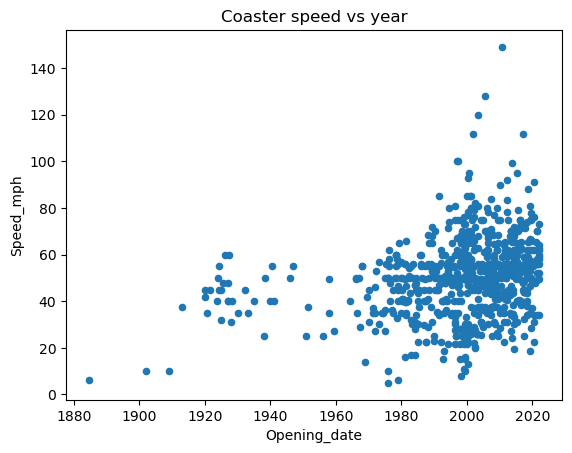

In [109]:
df.plot(kind = 'scatter' , y = 'Speed_mph' , x = 'Opening_date',
       title = 'Coaster speed vs year')
plt.show()

- Starting from 1910, there was a significant increase in speed, beginning at approximately 10 mph or below and rose up to a speed range of 30-40 mph
- the dots representing speed are densely clustered between the years 1980 to 2020, despite the peak speed being quite distant from the average speed during those years
- If it weren't for the lack of dots for the earlier years, using basic imputation methods, such as ffill or bfill will be suitable, given the densely cluttered speed during 1980 to 2020
- we have to look at other factors that impact the speed of the coasters
m

In [110]:
cor_matrix = df.corr()
cor_matrix['Speed_mph']

C:\Users\Aniel\AppData\Local\Temp\ipykernel_29892\3890113619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


Year_Introduced    0.250821
Latitude          -0.058753
Longitude          0.051550
Speed_mph          1.000000
Height_ft          0.818790
Inversions         0.237356
Gforce             0.541265
Comparison        -0.042294
Name: Speed_mph, dtype: float64

- based on the correlation matrix result, height_ft and gforce have relatively strong correlation with speed_mph
- these columns might be a good candindate for imputing the speed_mph column

- additionally, i believed that material type might have an impact on the roller coaster speed
- let's make a small adjustment, let's group the 'type_main' column into categorical values
- (e.g., 0 for 'Wood', 1 for 'Metal', 2 for 'Other')

In [111]:
df = df.copy().drop(columns = 'Comparison')

In [112]:
df['Type_Main_Num'] = df['Type_Main'].replace({'Wood': 0, 'Steel': 1, 'Other': 2})

df['Type_Main_Num'] = df['Type_Main_Num'].astype(int)

df.head()

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce,Type_Main_Num
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.9,0
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.0,0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,1896-01-01,NaN,NaN,0,NaN,2
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,NaN,1
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,NaN,1


- before any correlation test, let's look at the null percentage table

In [113]:
missing_value_table(df)

,Missing_value_counts,% of Total Values
Coaster_name,0,0.000000
Location,0,0.000000
Status,0,0.000000
Manufacturer,0,0.000000
Year_Introduced,0,0.000000
Latitude,78,9.241706
Longitude,78,9.241706
Type_Main,0,0.000000
Opening_date,0,0.000000
Speed_mph,117,13.862559


#### A problem has occurred
- 82% of the values for height_ft are nulls; 67% of the values for gforce are nulls
- the null percentage for the two columns are considered high

- few options (https://stackoverflow.com/questions/51421481/what-can-we-do-with-the-dataset-that-98-percent-of-the-columns-are-null-values)
- drop the columns or ignore the column 
- NOT fill the null values with them, because it will create enormous bias


    - https://datascience.stackexchange.com/questions/124442/dropping-dataframe-columns-with-missing-values
- dropping a column (feature) or not does not depend on how many missing values there are, but is this column useful for your task


- let's check the column correlation

#### by right, we should ignore the column because using ml predicting it might make it bias, however, for the sake of this project, let's do it for fun

#### Filling up Gforce before filling up the speed

In [114]:
df['Gforce'].unique()

array([ 2.9 , 12.  ,   nan,  3.7 ,  4.  ,  3.75,  3.  ,  3.2 ,  1.8 ,
        3.4 ,  2.4 ,  4.2 ,  4.9 ,  1.  ,  5.9 ,  3.5 ,  3.6 ,  3.1 ,
        6.5 ,  5.2 ,  2.1 ,  2.7 ,  3.9 ,  5.  ,  4.5 ,  3.8 ,  4.1 ,
        5.1 ,  2.3 ,  2.  ,  2.75,  2.5 ,  4.6 ,  4.3 ,  4.7 ,  2.2 ,
        4.8 ,  4.4 ,  3.26,  2.6 ,  4.18,  0.8 ,  1.5 ,  3.3 ,  5.6 ,
        1.2 ])

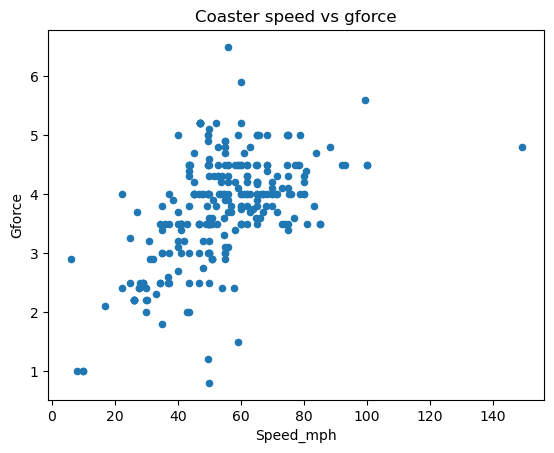

In [115]:
df.plot(kind = 'scatter' , y = 'Gforce' , x = 'Speed_mph',
       title = 'Coaster speed vs gforce')
plt.show()

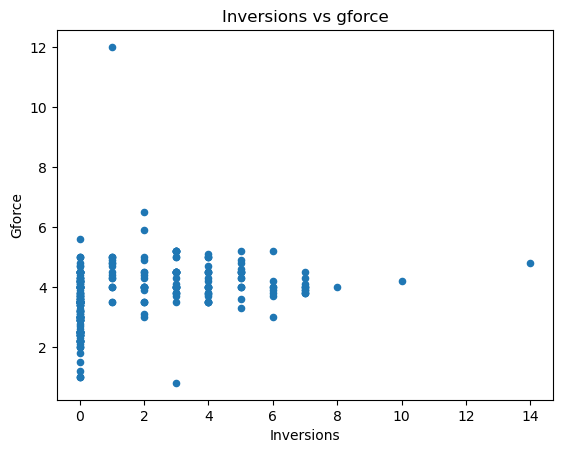

In [116]:
df.plot(kind = 'scatter' , y = 'Gforce' , x = 'Inversions',
       title = 'Inversions vs gforce')
plt.show()

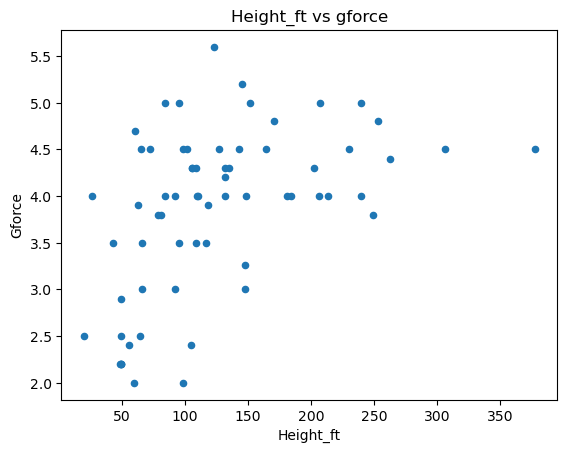

In [117]:
df.plot(kind = 'scatter' , y = 'Gforce' , x = 'Height_ft',
       title = 'Height_ft vs gforce')
plt.show()

In [118]:
cor_matrix = df.corr()
cor_matrix['Gforce']

C:\Users\Aniel\AppData\Local\Temp\ipykernel_29892\4272054287.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


Year_Introduced   -0.092382
Latitude           0.061975
Longitude          0.025231
Speed_mph          0.541265
Height_ft          0.486632
Inversions         0.314333
Gforce             1.000000
Type_Main_Num      0.046487
Name: Gforce, dtype: float64

In [119]:
cor_matrix = df.corr()
cor_matrix['Speed_mph']

C:\Users\Aniel\AppData\Local\Temp\ipykernel_29892\3890113619.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


Year_Introduced    0.250821
Latitude          -0.058753
Longitude          0.051550
Speed_mph          1.000000
Height_ft          0.818790
Inversions         0.237356
Gforce             0.541265
Type_Main_Num      0.057709
Name: Speed_mph, dtype: float64

- based on the correlation result, speed_mph, height_ft, and inversion are strongly correlated with gforce

In [205]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer


#### Using KNN Regression to make prediction for empty speed values using Year Introduced

In [206]:
df_clean = df.dropna(subset=['Year_Introduced', 'Speed_mph'])

In [207]:
df_knn = {
    'attributes' : df_clean[['Year_Introduced']],
    'target' :  df_clean[['Speed_mph']]
}

In [208]:
print(df_knn['attributes'])

     Year_Introduced
0               1884
6               1902
12              1909
13              1910
15              1912
..               ...
839             2022
840             2022
841             2022
842             2022
843             2022

[727 rows x 1 columns]


In [209]:
df_knn['attributes'].isnull().sum()

Year_Introduced    0
dtype: int64

In [210]:
print(df_knn['target'])

     Speed_mph
0          6.0
6         10.0
12        10.0
13        40.0
15        37.3
..         ...
839       64.0
840       62.1
841       34.0
842       63.0
843       58.0

[727 rows x 1 columns]


In [211]:
df_knn['target'].isnull().sum()

Speed_mph    0
dtype: int64

In [212]:
df_knn['target'].isnull().sum()

Speed_mph    0
dtype: int64

In [199]:
X_train, X_test, y_train, y_test = train_test_split(df_knn['attributes'], df_knn['target'], test_size=0.2, random_state=42)

# Store the split data
df_knn['train'] = {
    'attributes': X_train,
    'target': y_train
}

df_knn['test'] = {
    'attributes': X_test,
    'target': y_test
}

In [200]:
knr = KNeighborsRegressor(5)

In [201]:
X_train = df_knn['train']['attributes']
y_train = df_knn['train']['target']

knr.fit(X_train, y_train)


KNeighborsRegressor()

In [203]:
X_test = df_knn['train']['attributes']
y_test = df_knn['train']['target']

y_predict = knr.predict(X_test)


In [197]:
results = pd.DataFrame(list(zip(y_test,y_predict)), columns=['target', 'predicted'])

In [198]:
results.head(10)

,target,predicted
0,Speed_mph,[60.6]


In [183]:
results.tail(10)

,target,predicted
0,Speed_mph,[60.6]


- https://www.youtube.com/watch?v=_ukYsNbZy8Q&list=LL&index=1, this gives ValueError: Input X contains NaN.
- with little help of chatgpt, with the simpleImputer to handle missing values in the features before training
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [141]:
testing_3 = testing[['Speed_mph','Gforce','Height_ft']].copy()

In [142]:
# 1. separeate the null values and considered it as test data
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


correlated_col = ['Speed_mph', 'Height_ft']

# separate the gforce null value
test_data = testing_3.dropna(subset=['Gforce'])

# target variable used for training
y_train = test_data['Gforce']
# feature matrix used for training the model
X_train = test_data[correlated_col]


# linear regression cannot work with null, so inputation is needed
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# train model for prediction
lr = LinearRegression()
lr.fit(X_train, y_train)

# select the missing data for prediction
missing_data = testing_3.loc[testing['Gforce'].isnull(), correlated_col]

# we need to impute the missing data in df
missing_data_imputed = imputer.transform(missing_data)
predicted_gforce = lr.predict(missing_data_imputed)

# Filling missing values in the original DataFrame
predicted_gforce = testing_3.loc[testing['Gforce'].isnull(), 'Gforce'] = predicted_gforce


In [143]:
df['Gforce'] = testing_3['Gforce']

In [144]:
df = df.drop(columns = 'Comparison')

In [123]:
df

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_date,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Discontinued,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6.0,NaN,0,2.900000
1,Flip Flap Railway,Sea Lion Park,Discontinued,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,1,12.000000
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Discontinued,Unknown,1896,41.5800,-81.5700,Other,1896-01-01,NaN,NaN,0,3.782873
3,Loop the Loop (Coney Island),Other,Discontinued,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,1,3.782873
4,Loop the Loop (Young's Pier),Other,Discontinued,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,1,3.782873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,ArieForce One,Fun Spot America Atlanta,Operating,Rocky Mountain Construction,2022,NaN,NaN,Steel,2022-01-01,64.0,NaN,4,3.750000
840,Aquaman: Power Wave,Six Flags Over Texas,Operating,Mack Rides,2022,32.7560,-97.0710,Steel,2022-01-01,62.1,NaN,0,4.010648
841,Tumbili,Kings Dominion,Operating,S&S – Sansei Technologies,2022,NaN,NaN,Steel,2022-01-01,34.0,NaN,0,3.213145
842,Emperor (roller coaster),SeaWorld San Diego,Operating,Bolliger & Mabillard,2022,32.7640,-117.2224,Steel,2022-03-01,63.0,NaN,4,4.036190


#### let's do the same for height_ft

- let's check the correlation for height_ft

In [124]:
cor_matrix = df.corr()
cor_matrix['Speed_mph'] 

C:\Users\Aniel\AppData\Local\Temp\ipykernel_824\1692251829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


Year_Introduced    0.250821
Latitude          -0.058753
Longitude          0.051550
Speed_mph          1.000000
Height_ft          0.818790
Inversions         0.237356
Gforce             0.722297
Name: Speed_mph, dtype: float64

- based on the correlation table, gforce and speed_mph are strongly correlated with height_ft


In [125]:
testing_3 = df[['Speed_mph','Gforce','Height_ft']].copy()

In [126]:
testing_3

,Speed_mph,Gforce,Height_ft
0,6.0,2.900000,NaN
1,NaN,12.000000,NaN
2,NaN,3.782873,NaN
3,NaN,3.782873,NaN
4,NaN,3.782873,NaN
...,...,...,...
839,64.0,3.750000,NaN
840,62.1,4.010648,NaN
841,34.0,3.213145,NaN
842,63.0,4.036190,NaN


In [127]:
# 1. separeate the null values and considered it as test data
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer


correlated_col = ['Speed_mph', 'Gforce']

# separate the gforce null value
test_data = testing_3.dropna(subset=['Height_ft'])

# target variable used for training
y_train = test_data['Height_ft']
# feature matrix used for training the model
X_train = test_data[correlated_col]


# linear regression cannot work with null, so inputation is needed
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)

# train model for prediction
lr = LinearRegression()
lr.fit(X_train, y_train)

# select the missing data for prediction
missing_data = testing_3.loc[testing['Height_ft'].isnull(), correlated_col]

# we need to impute the missing data in df
missing_data_imputed = imputer.transform(missing_data)
predicted_height = lr.predict(missing_data_imputed)

# Filling missing values in the original DataFrame
predicted_height = testing_3.loc[testing['Height_ft'].isnull(), 'Height_ft'] = predicted_height


In [128]:
testing_3

,Speed_mph,Gforce,Height_ft
0,6.0,2.900000,-19.715742
1,NaN,12.000000,150.416545
2,NaN,3.782873,105.630616
3,NaN,3.782873,105.630616
4,NaN,3.782873,105.630616
...,...,...,...
839,64.0,3.750000,136.168500
840,62.1,4.010648,132.634321
841,34.0,3.213145,55.008948
842,63.0,4.036190,135.120543
